In [967]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [968]:
data_path = ('data/crime_CA_2013.xls')

crime_raw = pd.read_excel(data_path, header=4, skip_footer=3)

crime_raw.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
count,4.610000e+02,461.000000,461.000000,0.0,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,6.870973e+04,270.091106,3.030369,NaN,13.138829,104.164859,149.757050,1886.238612,412.746204,1170.431670,303.060738,13.451193
std,2.074063e+05,1005.430083,13.726171,NaN,43.320020,493.871968,476.513216,5433.123060,1027.496291,3516.262823,983.347088,70.487682
min,1.150000e+02,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000
25%,1.216800e+04,27.000000,0.000000,NaN,2.000000,5.000000,17.000000,279.000000,75.000000,161.000000,22.000000,1.000000
50%,3.265200e+04,77.000000,0.000000,NaN,5.000000,21.000000,51.000000,721.000000,175.000000,446.000000,77.000000,3.000000
75%,7.217100e+04,201.000000,2.000000,NaN,12.000000,66.000000,120.000000,1882.000000,402.000000,1196.000000,251.000000,10.000000
max,3.878725e+06,16524.000000,251.000000,NaN,764.000000,7885.000000,7624.000000,85844.000000,15728.000000,55734.000000,14382.000000,1430.000000


In [969]:
crime_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 13 columns):
City                                    461 non-null object
Population                              461 non-null int64
Violent
crime                           461 non-null int64
Murder and
nonnegligent
manslaughter    461 non-null int64
Rape
(revised
definition)1              0 non-null float64
Rape
(legacy
definition)2               461 non-null int64
Robbery                                 461 non-null int64
Aggravated
assault                      461 non-null int64
Property
crime                          461 non-null int64
Burglary                                461 non-null int64
Larceny-
theft                          461 non-null int64
Motor
vehicle
theft                     461 non-null int64
Arson                                   461 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 46.9+ KB


In [970]:
# set raw to df
df = crime_raw

# drop rape1
df = df.drop(df.columns[4], 1)

In [971]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson'],
      dtype='object')

In [972]:
# rename columns
df.columns = [
            'city', 'population', 'violent_crime', 'murder', 
            'rape', 'robbery', 'agg_assault',
            'property_crime', 'burglary', 'larceny', 'gta', 'arson'
        ]



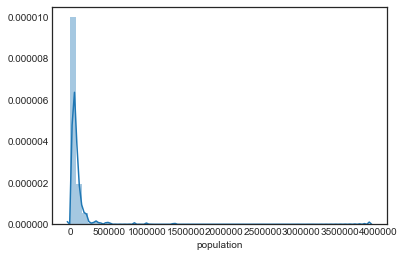

In [973]:
import warnings
warnings.filterwarnings('ignore')

g = sns.distplot(df.population)
plt.show()

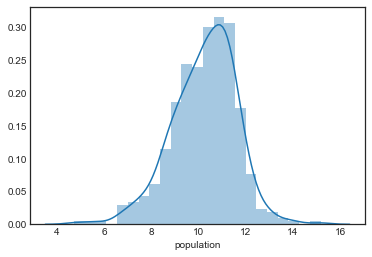

In [974]:
# log transformation creates normal dist
g = sns.distplot(np.log(df.population))
plt.show()

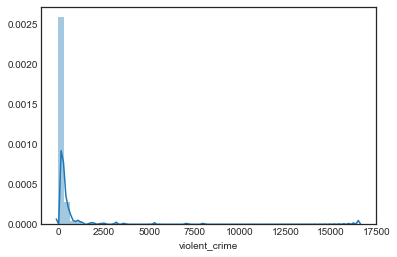

In [975]:
g = sns.distplot(df.violent_crime)
plt.show()

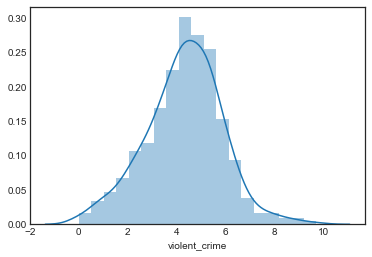

In [976]:
g = sns.distplot(np.log(df.violent_crime+1))
plt.show()

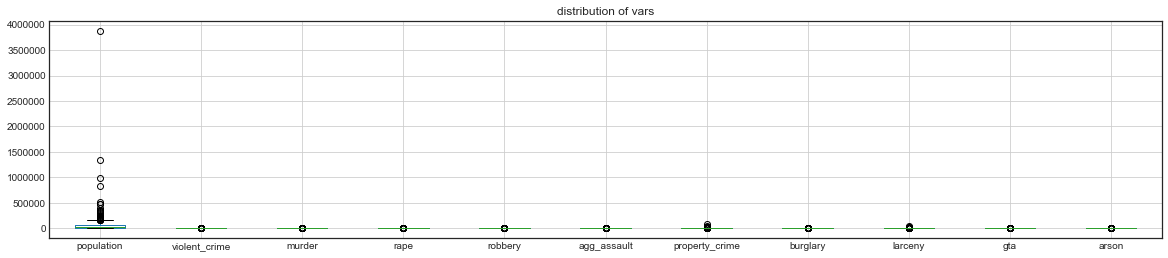

In [977]:
# show boxplot of all vars

df.plot(subplots=False, kind='box', layout=(3,4),
                   title='distribution of vars', grid=True)

plt.subplots_adjust(right=2.7)
plt.show()

In [978]:
# Create zeros for rape, murder, arson
def binary(x):
    result = 0
    if x > 0:
        result = 1
    return result

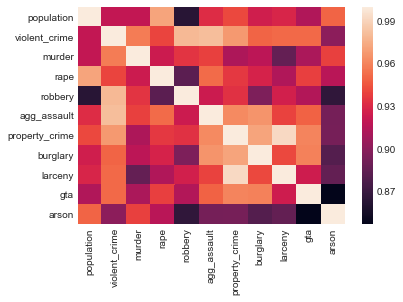

In [979]:
# Show corrmat of raw data
correlation_matrix = df.corr()

ax = sns.heatmap(correlation_matrix)

plt.show()

# log transform all values with < 10% zero value counts
    rape, arson, and murder are greater than 10% zero values

In [980]:
#count % of zeros
(df[df == 0].count()/df.count()).sort_values()

city              0.000000
population        0.000000
property_crime    0.000000
larceny           0.000000
burglary          0.002169
violent_crime     0.008677
agg_assault       0.019523
gta               0.028200
robbery           0.075922
rape              0.130152
arson             0.197397
murder            0.544469
dtype: float64

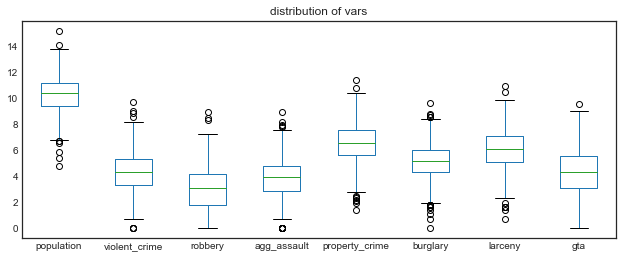

In [981]:
# show boxplot of all log transformed vars

data = np.log(df.drop(['rape', 'arson', 'murder', 'city'], 1)+1)
data.plot(kind='box', layout=(3,4), grid=False,
                   title='distribution of vars')

plt.subplots_adjust(right=1.5)
plt.show()

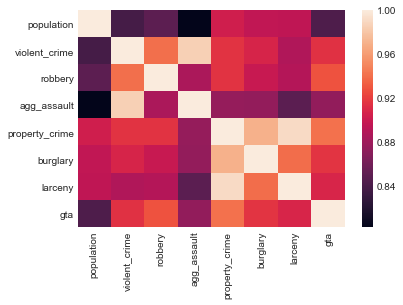

In [982]:
# Show corrmat of log data
correlation_matrix = data.corr()

ax = sns.heatmap(correlation_matrix)

plt.show()

In [983]:
# Create zeros for rape, murder, arson
def binary(x):
    result = 0
    if x > 0:
        result = 1
    return result

In [984]:
# create binary data and join to log transformed data
features = data.join(df[['rape', 'arson', 'murder']].applymap(binary))

features.head()

,population,violent_crime,robbery,agg_assault,property_crime,burglary,larceny,gta,rape,arson,murder
0,10.347083,5.293305,3.970292,4.867534,6.787845,5.945421,5.921578,4.897840,1,1,1
1,9.940928,2.995732,2.397895,2.079442,5.726848,4.700480,5.225747,2.564949,1,1,0
2,11.241209,5.068904,4.454347,4.158883,7.551187,5.662960,7.159292,5.802118,1,1,0
3,9.857705,3.401197,3.218876,1.609438,6.324359,4.553877,5.963579,4.330733,1,1,0
4,11.347001,5.099866,4.406719,4.290459,7.481556,5.843544,7.087574,5.459586,1,1,1


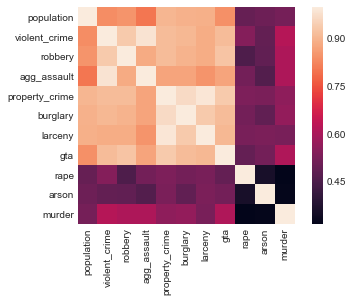

In [985]:
correlation_matrix = features.corr()

ax = sns.heatmap(correlation_matrix, square=True)

plt.show()

In [986]:
features['vgta'] = ((features[['violent_crime', 'robbery',
       'property_crime', 'burglary', 'larceny', 'gta']]>=3).astype(int) == 1).any(axis=1).astype(int)

In [987]:
# means = df[['violent_crime', 'robbery', 'agg_assault',
#        'property_crime', 'burglary', 'larceny', 'gta']].mean(axis=0)
# stds = df[['violent_crime', 'robbery', 'agg_assault',
#        'property_crime', 'burglary', 'larceny', 'gta']].std(axis=0)
# features['pop_crime'] = ((df[['violent_crime', 'robbery', 'agg_assault',
#        'property_crime', 'burglary', 'larceny', 'gta']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df.loc[:, ['violent_crime', 'robbery',
       'property_crime', 'burglary', 'larceny', 'gta']]
plotdf['vgta'] = features['vgta'] 
corrmat2 = plotdf.corr()

print(corrmat2)

                violent_crime   robbery  property_crime  burglary   larceny  \
violent_crime        1.000000  0.979723        0.967836  0.950135  0.951615   
robbery              0.979723  1.000000        0.933992  0.895248  0.925976   
property_crime       0.967836  0.933992        1.000000  0.972127  0.992472   
burglary             0.950135  0.895248        0.972127  1.000000  0.941483   
larceny              0.951615  0.925976        0.992472  0.941483  1.000000   
gta                  0.951835  0.913871        0.960469  0.959672  0.923975   
vgta                 0.041734  0.032925        0.054027  0.062319  0.051807   

                     gta      vgta  
violent_crime   0.951835  0.041734  
robbery         0.913871  0.032925  
property_crime  0.960469  0.054027  
burglary        0.959672  0.062319  
larceny         0.923975  0.051807  
gta             1.000000  0.048136  
vgta            0.048136  1.000000  


In [988]:
data = features[['population', 'vgta', 'rape', 'arson', 'murder', 'agg_assault']]

data.head()

,population,vgta,rape,arson,murder,agg_assault
0,10.347083,1,1,1,1,4.867534
1,9.940928,1,1,1,0,2.079442
2,11.241209,1,1,1,0,4.158883
3,9.857705,1,1,1,0,1.609438
4,11.347001,1,1,1,1,4.290459


In [989]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# Take a subset of the data for PCA and drop missing values because PCA cannot
# handle them. We could also impute, but missingness is quite low so dropping
# missing rows is unlikely to create bias.
df_pca = data

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)


In [990]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 6).T

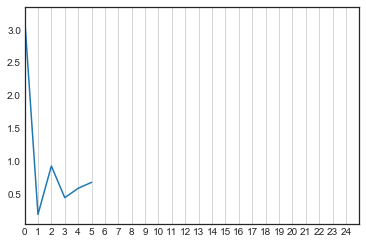

In [991]:
plt.plot(eig_val_cov)
plt.xlim(0, 25)
plt.xticks(np.arange(0, 25, 1))
plt.grid(b=None, which='major', axis='x', animated=True)

plt.show()

In [992]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 6).T


print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.53213985 0.03103898 0.15381089 0.07342852 0.09727036 0.11231141]


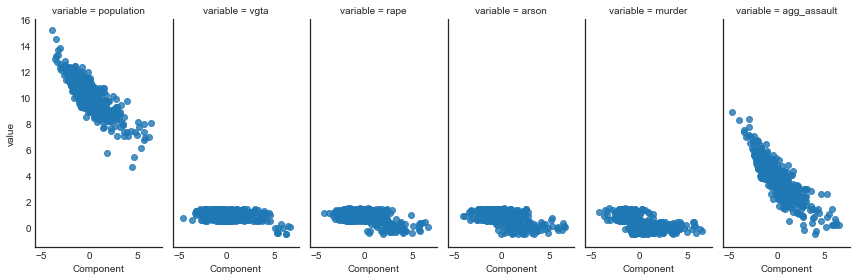

In [993]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = df_pca
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

   population  vgta  rape  arson  murder  agg_assault  Component
0   10.347083     1     1      1       1     4.867534  -1.169241
1    9.940928     1     1      1       0     2.079442   0.662368
2   11.241209     1     1      1       0     4.158883  -0.490754
3    9.857705     1     1      1       0     1.609438   0.847000
4   11.347001     1     1      1       1     4.290459  -1.340133


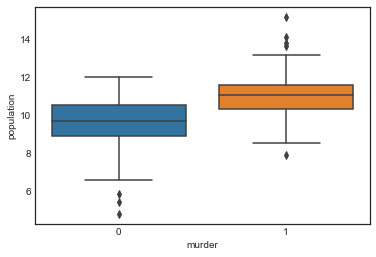

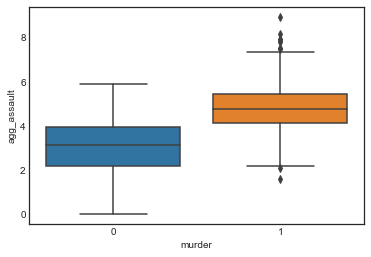

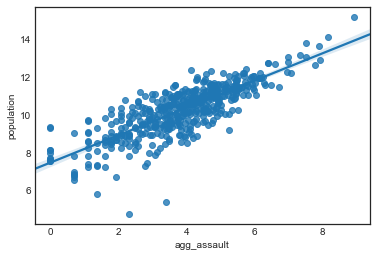

In [994]:
# Take a peek.
df = data
print(df.head())

# Prettier plots are better.
sns.set_style("white")

# Bivariate relationships of predictors to admissions outcome.
sns.boxplot(x="murder", y="population", data=df)
plt.show()
sns.boxplot(x="murder", y="agg_assault", data=df)
plt.show()

# Relationship between predictors.
sns.regplot(x='agg_assault', y='population', data=df)
plt.show()

In [995]:
# Declare predictors.
X_statsmod = df[['population']]

# The Statsmodels formulation requires a column with constant value 1 that
# will act as the intercept.
X_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(df['murder'], X_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.521271
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 murder   No. Observations:                  461
Model:                          Logit   Df Residuals:                      459
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 May 2018   Pseudo R-squ.:                  0.2436
Time:                        01:10:34   Log-Likelihood:                -240.31
converged:                       True   LL-Null:                       -317.72
                                        LLR p-value:                 1.534e-35
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
population     1.1843      0.122      9.699      0.000       0.945       1.424
intercept    -12.4581      1.

In [996]:
# Calculate accuracy. First, get probability that each row will be admitted.
pred_statsmod = result.predict(X_statsmod)

# Code admission as 1 if probability is greater than .5.
pred_y_statsmod = np.where(pred_statsmod < .5, 0, 1)

# Accuracy table.
table = pd.crosstab(df['murder'], pred_y_statsmod)

print('\n Accuracy by murder status')
print(table)
print('\n Percentage accuracy')
print((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum()))


 Accuracy by murder status
col_0     0    1
murder          
0       189   62
1        61  149

 Percentage accuracy
0.7331887201735358


Change 
```Python
C = 10, penalty='l1'
```

In [997]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(penalty='l1', C=10)
y = df['murder']
X = df[['population']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[1.09063464]]
[-11.47689308]

 Accuracy by admission status
murder    0    1
row_0           
0       190   61
1        61  149

 Percentage accuracy
0.735357917570499


In [998]:
df['ram'] = (df[['rape', 'arson', 'murder']] == 1).any(axis=1).astype(int)
# df = df.drop(['rape', 'arson', 'murder', 'Component'], 1)

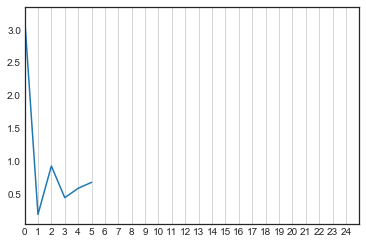

In [999]:
df_pca = df

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)

plt.plot(eig_val_cov)
plt.xlim(0, 25)
plt.xticks(np.arange(0, 25, 1))
plt.grid(b=None, which='major', axis='x', animated=True)

plt.show()

# Vanilla Logistic

In [1000]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(penalty='l2', C=10)

y = df['murder']
X = df[['population']]

# Create Training Set and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Fit the model.
fit = lr.fit(X_train, y_train)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X_test)

print('\n Accuracy by murder status')
print(pd.crosstab(pred_y_sklearn, y_test))

print('\n Percentage accuracy')
print('score:', lr.score(X_test, y_test))
print('10-fold CV:', cross_val_score(lr, X_test, y_test, cv=10))
print("-" * 100 + '\n')

Coefficients
[[0.98113721]]
[-10.3423865]

 Accuracy by murder status
murder   0   1
row_0         
0       39  14
1        9  31

 Percentage accuracy
score: 0.7526881720430108
10-fold CV: [0.6        0.6        0.9        0.7        0.8        0.66666667
 0.66666667 0.55555556 0.875      0.75      ]
----------------------------------------------------------------------------------------------------



In [1001]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=True) 

fit = ridgeregr.fit(X_train, y_train)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)


print('\n Percentage accuracy')
print('score:', ridgeregr.score(X_test, y_test))
print('10-fold CV:', cross_val_score(ridgeregr, X_test, y_test, cv=10))
print("-" * 100 + '\n')

Coefficients
[0.19003512]
-1.4946208508887997

 Percentage accuracy
score: 0.3104916716687356
10-fold CV: [ 0.14357227  0.38894311 -0.1136817   0.5552926   0.32030598 -0.03390591
 -0.58595361 -0.85633997  0.34569524  0.23572718]
----------------------------------------------------------------------------------------------------



In [1002]:
lass = linear_model.Lasso(alpha=0.01) 
fit = lass.fit(X_train, y_train)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)


print('R² for the model with few features:')
print('score:', lass.score(X_test, y_test))
print('10-fold CV:', cross_val_score(lass, X_test, y_test, cv=10))
print("-" * 100 + '\n')

Coefficients
[0.18723802]
-1.4660222331658177
R² for the model with few features:
score: 0.3106933356120408
10-fold CV: [ 0.14351058  0.39566904 -0.111637    0.55402962  0.32466143 -0.03724242
 -0.56360835 -0.86775815  0.35051612  0.21936496]
----------------------------------------------------------------------------------------------------



# Vanilla wins because PCA nominated population as the best predictor of murder status

Final Logistic Formula:

$$ \alpha = -10.34 $$
$$ P(murder) = \alpha + 0.98*log(Population + 1)$$